In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

data1 = np.loadtxt("dataset1.txt")

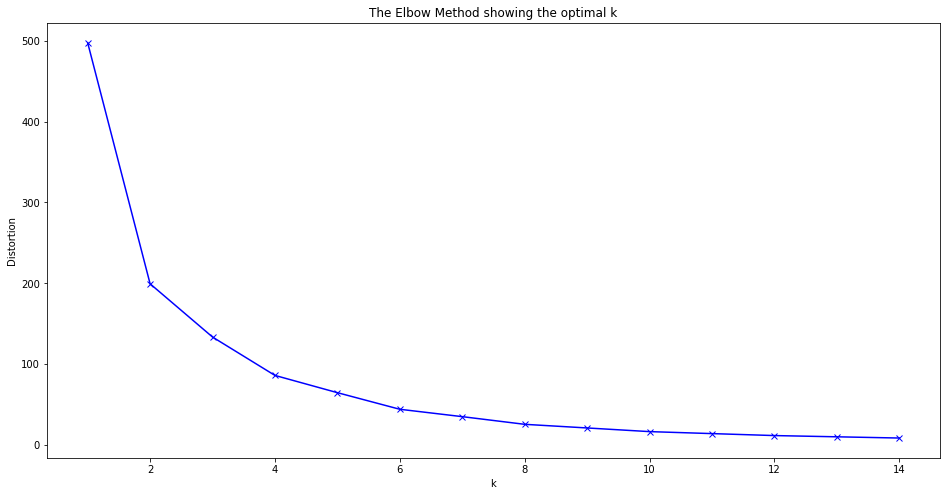

In [2]:
distortions = []
K = range(1,15)
for k in K:
    Model = KMeans(n_clusters=k)
    Model.fit(data1)
    distortions.append(Model.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

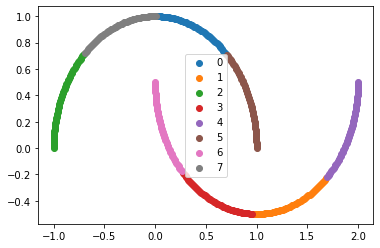

In [3]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(data1)
label = kmeans.labels_

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(data1[label == i , 0] , data1[label == i , 1] , label = i)

plt.legend()
plt.show()

In [4]:
class DBSCAN:
    
    def __init__(self, data, epsilon, MinPts):
        self.data = data
        self.epsilon = epsilon
        self.MinPts = MinPts
        self.distances = distance_matrix(self.data, self.data)
        self.NumPts = len(self.data)
        self.labels = np.zeros(self.NumPts)
        self.labels -= 1
    
    def __expandCluster(self, point_index, clusterID):
        
        neighbours = []
        for i in range(self.NumPts):
            if self.distances[point_index, i] < self.epsilon:
                neighbours.append(i)
        
        if len(neighbours) < self.MinPts:
            return False
        
        while len(neighbours) != 0:
            temp = []
            for i in range(self.NumPts):
                if self.distances[neighbours[0], i] < self.epsilon:
                    temp.append(i)
            for k in range(len(neighbours)):
                self.labels[neighbours[k]] = clusterID
            if len(temp) >= self.MinPts:
                for j in range(len(temp)):
                    if self.labels[temp[j]] == -1:
                        neighbours.append(temp[j])
                        self.labels[temp[j]] = clusterID
            neighbours.pop(0)
                        
        return True
    
    def fit(self):
        
        clusterID = 0
        
        for i in range(self.NumPts):
            if self.labels[i] != -1:
                continue
            if self.__expandCluster(i, clusterID):
                self.labels[i] = clusterID
                clusterID += 1
            
        return self.labels

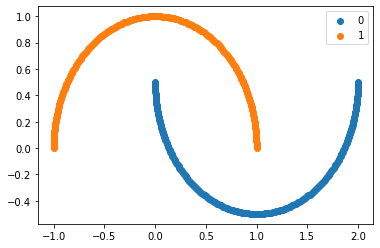

<Figure size 432x288 with 0 Axes>

In [5]:
label = DBSCAN(data1, 0.2, 4).fit()
u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(data1[label == i , 0] , data1[label == i , 1] , label = int(i))

plt.legend()
plt.show()
plt.clf()

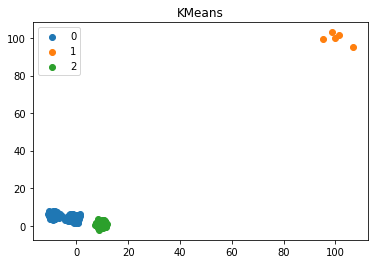

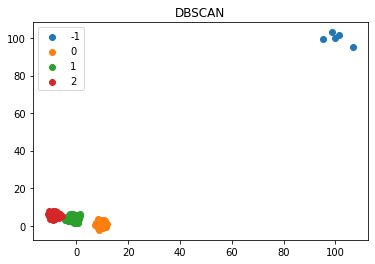

In [8]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data2)
label = kmeans.labels_

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(data2[label == i , 0] , data2[label == i , 1] , label = i)

plt.legend()
plt.title("KMeans")
plt.show()
plt.clf()

label = DBSCAN(data2, 1.5, 2).fit()
u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(data2[label == i , 0] , data2[label == i , 1] , label = int(i))

plt.legend()
plt.title("DBSCAN")
plt.show()